# House Prices: Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder # col normalization
from  sklearn.decomposition import PCA # reducing the dimensions and finding the optimal components
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor #ensemble
from sklearn.tree import DecisionTreeRegressor #decision tree
from sklearn.linear_model import LinearRegression # linear regression

In [2]:
#import test and train
train=pd.read_csv('C:\\Users\\Ashok\\Desktop\\unsupervised\\day-04\\train.csv')

In [3]:
test=pd.read_csv('C:\\Users\\Ashok\\Desktop\\unsupervised\\day-04\\test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

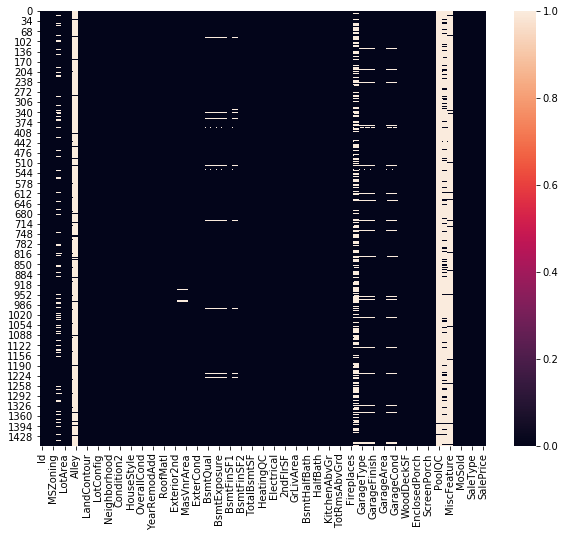

In [8]:
#visualize the missing values
plt.figure(figsize=[10,8])
sns.heatmap(train.isnull())
#white space menas missing values

In [9]:
#the columns that have missing values are 

In [10]:
test.shape

(1459, 80)

In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

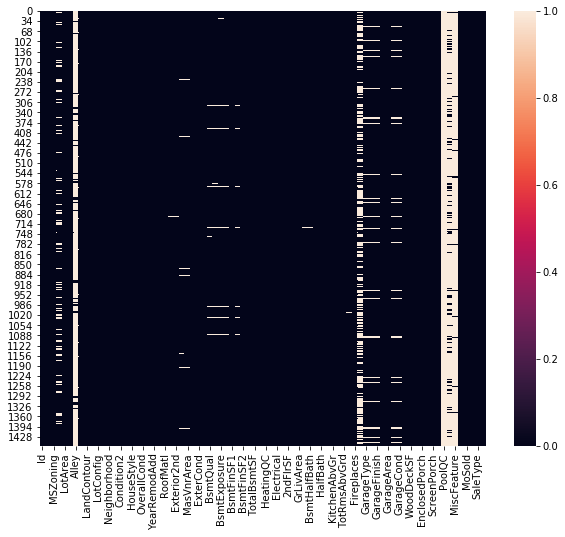

In [13]:
#visualize the missing values
plt.figure(figsize=[10,8])
sns.heatmap(test.isnull())
#white space menas missing values

In [14]:
#to find the total number of question marks in the entir dataset
sum(train.MSZoning=='?')

0

In [15]:
a=[]
b=[]
for i in train.columns:
    if train[i].dtype=='object':
        a=sum(train.MSZoning=='?')
        b.append(a)
print(b)
print(len(b))
        

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
43


In [16]:
#finding if the columns have ?
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
for i in train.columns:
    if train[i].dtype=='object':
        print(i,':',sum(train[i]=='?'))

MSZoning : 0
Street : 0
Alley : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 0
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 0
BsmtCond : 0
BsmtExposure : 0
BsmtFinType1 : 0
BsmtFinType2 : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 0
KitchenQual : 0
Functional : 0
FireplaceQu : 0
GarageType : 0
GarageFinish : 0
GarageQual : 0
GarageCond : 0
PavedDrive : 0
PoolQC : 0
Fence : 0
MiscFeature : 0
SaleType : 0
SaleCondition : 0


In [18]:
#there are ? in any of the object columns

# Remove missing values

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [21]:
train.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [22]:
train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [23]:
# delete alley,poolqc and miscfeature in both train and test

In [24]:
#fence is also having very less values

In [25]:
sum(train.Fence.value_counts())/1460

0.19246575342465752

In [26]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [27]:
train[train.Fence=='MnPrv']['SalePrice'].describe()

count       157.000000
mean     148751.089172
std       66096.069463
min       40000.000000
25%      119900.000000
50%      137450.000000
75%      158000.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [28]:
train[train.Fence=='GdPrv']['SalePrice'].describe()

count        59.000000
mean     178927.457627
std       56757.237563
min      108000.000000
25%      144950.000000
50%      167500.000000
75%      189475.000000
max      475000.000000
Name: SalePrice, dtype: float64

In [29]:
train[train.Fence=='GdWo']['SalePrice'].describe()

count        54.000000
mean     140379.314815
std       53592.585059
min       34900.000000
25%      118625.000000
50%      138750.000000
75%      151750.000000
max      381000.000000
Name: SalePrice, dtype: float64

In [30]:
train[train.Fence=='MnWw']['SalePrice'].describe()

count        11.000000
mean     134286.363636
std       21781.805376
min      110000.000000
25%      121500.000000
50%      130000.000000
75%      143000.000000
max      187000.000000
Name: SalePrice, dtype: float64

In [31]:
train[train.Alley=='Grvl']['SalePrice'].describe()

count        50.000000
mean     122219.080000
std       34780.780734
min       52500.000000
25%      105312.500000
50%      119500.000000
75%      136750.000000
max      256000.000000
Name: SalePrice, dtype: float64

In [32]:
train[train.Alley=='Pave']['SalePrice'].describe()

count        41.000000
mean     168000.585366
std       38370.375243
min       40000.000000
25%      151000.000000
50%      172500.000000
75%      185000.000000
max      265979.000000
Name: SalePrice, dtype: float64

In [33]:
train['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [34]:
#imputing the missing balues with median   #for numerical columns
train.fillna(train.median(),inplace=True)
test.fillna(test.median(),inplace=True)

In [35]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt         0
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

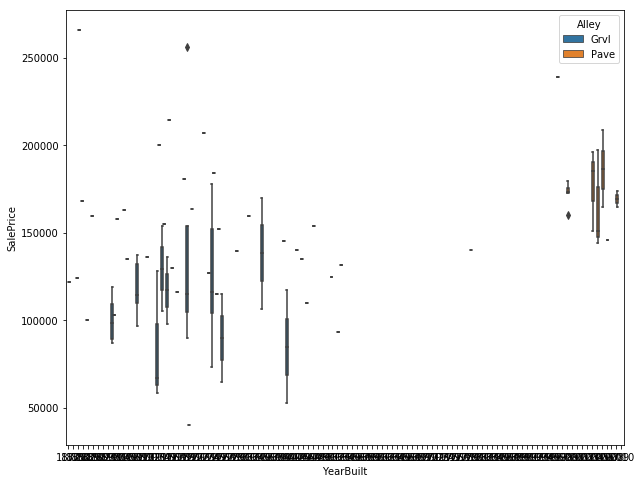

In [36]:
plt.figure(figsize=[10,8])
sns.boxplot(x='YearBuilt',y='SalePrice',data=train,hue='Alley')

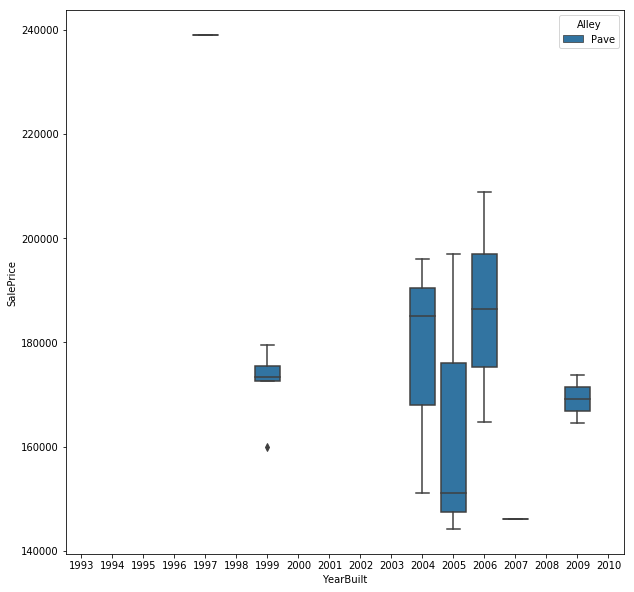

In [37]:
plt.figure(figsize=[10,10])
sns.boxplot(x='YearBuilt',y='SalePrice',data=train[train.YearBuilt>1992],hue='Alley')

In [38]:
#from this we can infer that after 1993 there is only pave alley

In [39]:
#imputing Alley as Pave

In [40]:
train.Alley.value_counts() #disaster its not working

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [41]:
train.loc[train.YearBuilt>1999,"Alley"] =train.loc[train.YearBuilt>1999,"Alley"].fillna('Pave')

In [42]:
train.loc[train.YearBuilt<=1999,"Alley"] =train.loc[train.YearBuilt<=1999,"Alley"].fillna('Grvl')

In [43]:
train.Alley.value_counts()

Grvl    1048
Pave     412
Name: Alley, dtype: int64

In [44]:
test.loc[test.YearBuilt>1999,"Alley"] =test.loc[test.YearBuilt>1999,"Alley"].fillna('Pave')

In [45]:
test.loc[test.YearBuilt<=1999,"Alley"] =test.loc[test.YearBuilt<=1999,"Alley"].fillna('Pave')

In [46]:
test.Alley.value_counts()

Pave    1389
Grvl      70
Name: Alley, dtype: int64

In [47]:
###########

In [48]:
#FireplaceQu,GarageCond,GarageQual,GarageType GarageFinish

In [49]:
train.FireplaceQu.value_counts() #check gd,ta,fa,ex,po

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [50]:
#impute gd in fireplaceQu
train.FireplaceQu.fillna('Gd',inplace=True)
test.FireplaceQu.fillna('Gd',inplace=True)

In [51]:
train.GarageType.value_counts() 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

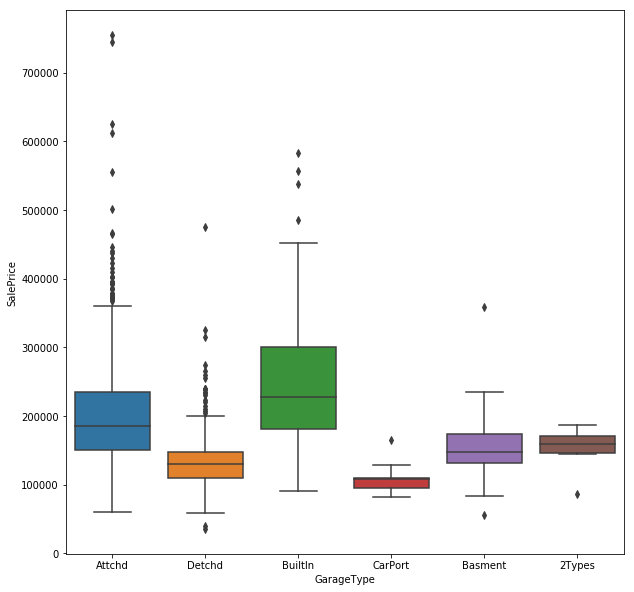

In [52]:
plt.figure(figsize=[10,10])
sns.boxplot(x='GarageType',y='SalePrice',data=train)

In [53]:
train[train.GarageType=='Detchd']['SalePrice'].describe()

count       387.000000
mean     134091.162791
std       41391.549953
min       35311.000000
25%      110000.000000
50%      129500.000000
75%      147700.000000
max      475000.000000
Name: SalePrice, dtype: float64

In [54]:
#impute attached in garage type

In [55]:
train.GarageType.fillna('Attchd',inplace=True)
test.GarageType.fillna('Attchd',inplace=True)

In [56]:
#impute in GarageFinish
train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [57]:
train.GarageFinish.fillna('Unf',inplace=True)
test.GarageFinish.fillna('Unf',inplace=True)

In [58]:
#impute in GarageQual
train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [59]:
train.GarageQual.fillna('TA',inplace=True)
test.GarageQual.fillna('TA',inplace=True)

In [60]:
#impute in GarageCond
train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [61]:
train.GarageCond.fillna('TA',inplace=True)
test.GarageCond.fillna('TA',inplace=True)

In [62]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive

In [63]:
newtrain=train.drop(['PoolQC','Fence','MiscFeature','Id'],axis=1)
newtest=test.drop(['PoolQC','Fence','MiscFeature','Id'],axis=1)

In [64]:
#make sure train and test dimension matches

In [65]:
newtest.shape

(1459, 76)

In [66]:
newtrain.shape

(1460, 77)

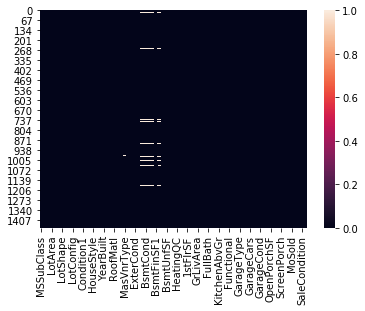

In [67]:
sns.heatmap(newtrain.isnull())

In [68]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [69]:
train.MasVnrType.isnull().sum()

8

In [70]:
newtrain.MasVnrType.fillna('None',inplace=True)
newtest.MasVnrType.fillna('None',inplace=True)

In [71]:
newtrain.BsmtCond.isnull().sum()

37

In [72]:
newtrain.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [73]:
newtrain.BsmtCond.fillna('TA',inplace=True)
newtest.BsmtCond.fillna('TA',inplace=True)

In [74]:
newtrain.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [75]:
newtrain.BsmtQual.fillna('TA',inplace=True)
newtest.BsmtQual.fillna('TA',inplace=True)

In [76]:
newtrain.BsmtFinType1.fillna('Unf',inplace=True)
newtest.BsmtFinType1.fillna('Unf',inplace=True)

In [77]:
newtrain.BsmtFinType2.fillna('Unf',inplace=True)
newtest.BsmtFinType2.fillna('Unf',inplace=True)

In [78]:
newtrain.Electrical.fillna('SBrkr',inplace=True)
newtest.Electrical.fillna('SBrkr',inplace=True)

In [79]:
newtrain.BsmtExposure.fillna('No',inplace=True)
newtest.BsmtExposure.fillna('No',inplace=True)


In [80]:
newtrain.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [81]:
sum(newtrain.isnull().sum())

0

In [82]:
sum(newtest.isnull().sum())

12

In [83]:
newtest.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional       2
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [84]:
newtest.SaleType.fillna('WD',inplace=True)

In [85]:
newtest.Exterior1st.fillna('VinylSd',inplace=True)

In [86]:
newtest.Exterior2nd.fillna('VinylSd',inplace=True)

In [87]:
newtest.Functional.fillna('Typ',inplace=True)

In [88]:
newtest.KitchenQual.fillna('TA',inplace=True)

In [89]:
newtest.KitchenQual.value_counts()

TA    758
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [90]:
newtest.MSZoning.fillna('RL',inplace=True)

In [91]:
newtest.Utilities.fillna('AllPub',inplace=True)

In [92]:
#getdummies,scale, pca, no of components,120 components, 

# apply standard scalar and PCA

In [93]:
sc=StandardScaler()

In [94]:
newtrain_dummy=pd.get_dummies(newtrain)
newtest_dummy=pd.get_dummies(newtest)

In [95]:
print(newtrain_dummy.shape)
print(newtest_dummy.shape)

(1460, 278)
(1459, 261)


In [96]:
#scaling the Dataset
scaletrain=sc.fit_transform(newtrain_dummy)
scaletest=sc.fit_transform(newtest_dummy)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [97]:
scaletrain_df=pd.DataFrame(scaletrain,columns=newtrain_dummy.columns)

In [98]:
scaletest_df=pd.DataFrame(scaletest,columns=newtest_dummy.columns)

In [99]:
scaletest_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [100]:
scaletrain_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [101]:
#define y values
#xtrain=scaletrain_df.drop('SalePrice',axis=1)
y=scaletrain_df.SalePrice

In [102]:
from sklearn.decomposition import PCA
pc=PCA()

In [103]:
pca_val=pc.fit_transform(scaletrain_df)

In [104]:
pc.explained_variance_

array([1.96786102e+01, 8.57034746e+00, 6.87016499e+00, 5.68040676e+00,
       4.73659430e+00, 4.56399281e+00, 4.04788737e+00, 3.63418186e+00,
       3.46807777e+00, 3.20507171e+00, 3.09001074e+00, 3.01842705e+00,
       2.91234422e+00, 2.86719565e+00, 2.77491609e+00, 2.71917179e+00,
       2.68646120e+00, 2.59682827e+00, 2.49732906e+00, 2.44891804e+00,
       2.43019310e+00, 2.37930929e+00, 2.32816666e+00, 2.31746882e+00,
       2.23687622e+00, 2.20919429e+00, 2.18615221e+00, 2.17818304e+00,
       2.12663605e+00, 2.12158932e+00, 2.07716911e+00, 2.04451772e+00,
       2.00998648e+00, 1.97987589e+00, 1.96224344e+00, 1.92795645e+00,
       1.91267269e+00, 1.88375049e+00, 1.84114054e+00, 1.80591949e+00,
       1.78743605e+00, 1.77170266e+00, 1.75735334e+00, 1.73164856e+00,
       1.69961296e+00, 1.67993283e+00, 1.66709079e+00, 1.64277533e+00,
       1.61737068e+00, 1.59268395e+00, 1.57468439e+00, 1.54827869e+00,
       1.53614538e+00, 1.51814072e+00, 1.50350153e+00, 1.48366987e+00,
      

In [105]:
pc.explained_variance_ratio_

array([7.07378836e-02, 3.08074725e-02, 2.46958971e-02, 2.04191226e-02,
       1.70264390e-02, 1.64059956e-02, 1.45507728e-02, 1.30636428e-02,
       1.24665553e-02, 1.15211383e-02, 1.11075334e-02, 1.08502145e-02,
       1.04688830e-02, 1.03065893e-02, 9.97487576e-03, 9.77449406e-03,
       9.65691063e-03, 9.33471088e-03, 8.97704519e-03, 8.80302408e-03,
       8.73571432e-03, 8.55280440e-03, 8.36896414e-03, 8.33050902e-03,
       8.04080617e-03, 7.94129907e-03, 7.85847067e-03, 7.82982423e-03,
       7.64453038e-03, 7.62638912e-03, 7.46671364e-03, 7.34934303e-03,
       7.22521503e-03, 7.11697775e-03, 7.05359509e-03, 6.93034507e-03,
       6.87540516e-03, 6.77143974e-03, 6.61827152e-03, 6.49166387e-03,
       6.42522221e-03, 6.36866606e-03, 6.31708517e-03, 6.22468525e-03,
       6.10952822e-03, 6.03878485e-03, 5.99262210e-03, 5.90521633e-03,
       5.81389530e-03, 5.72515491e-03, 5.66045266e-03, 5.56553317e-03,
       5.52191807e-03, 5.45719747e-03, 5.40457459e-03, 5.33328655e-03,
      

In [106]:
np.cumsum(pc.explained_variance_ratio_)

array([0.07073788, 0.10154536, 0.12624125, 0.14666038, 0.16368681,
       0.18009281, 0.19464358, 0.20770723, 0.22017378, 0.23169492,
       0.24280245, 0.25365267, 0.26412155, 0.27442814, 0.28440302,
       0.29417751, 0.30383442, 0.31316913, 0.32214618, 0.3309492 ,
       0.33968491, 0.34823772, 0.35660668, 0.36493719, 0.372978  ,
       0.3809193 , 0.38877777, 0.39660759, 0.40425212, 0.41187851,
       0.41934523, 0.42669457, 0.43391978, 0.44103676, 0.44809036,
       0.4550207 , 0.46189611, 0.46866755, 0.47528582, 0.48177748,
       0.4882027 , 0.49457137, 0.50088846, 0.50711314, 0.51322267,
       0.51926145, 0.52525408, 0.53115929, 0.53697319, 0.54269834,
       0.5483588 , 0.55392433, 0.55944625, 0.56490344, 0.57030802,
       0.5756413 , 0.58095145, 0.58621506, 0.59136893, 0.59645584,
       0.6014911 , 0.60646991, 0.6114135 , 0.61630713, 0.62117685,
       0.62601929, 0.63078746, 0.63550561, 0.64014228, 0.64471731,
       0.64927276, 0.65381337, 0.65834269, 0.66281477, 0.66726

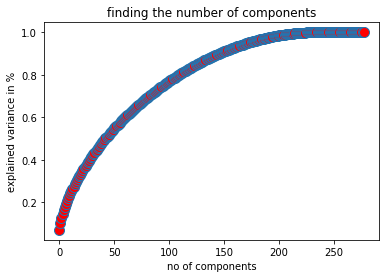

In [107]:
plt.plot(np.cumsum(pc.explained_variance_ratio_),"-o",linestyle="dashed",markerfacecolor="red",markersize=10) 
plt.xlabel("no of components")
plt.ylabel("explained variance in %")
plt.title("finding the number of components")
plt.show()

In [108]:
#############################after pca reduced ##############

In [109]:
pc=PCA(n_components=120)

In [110]:
pc_train=pd.DataFrame(pc.fit_transform(scaletrain_df))
pc_test=pd.DataFrame(pc.fit_transform(scaletest_df))

In [111]:
######Linear Regression ####

In [112]:
##Apply linear regression
lr=LinearRegression()

In [113]:
lr.fit(pc_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
lr_model=lr.predict(pc_test)

In [115]:
#these values are not the correct values, we have to inverse the values from standard scalar

In [116]:
#take any random col and do fit_transform

In [117]:
#then do inverse

In [118]:
scaled=sc.fit_transform(pd.DataFrame(train.SalePrice)) # re initiated the fit transform
#have to save this in a variable, now the fit_transform is refreshed.
#Now we will get the inverse transform values

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [119]:
actual_values=sc.inverse_transform(lr_model)

In [120]:
#prepare the dataframe for submission

In [121]:
# run test again to get ID values
ID=test.Id
SalePrice=actual_values

In [122]:
Solution=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [123]:
Solution.to_csv('HousePrice_LR_Model.csv',index=False)  #it will be saved in working directory

In [124]:
cd #this is the working directory

[WinError 2] The system cannot find the file specified: '#this is the working directory'
C:\Users\Ashok\Downloads


In [125]:
####Decision Tree####

In [126]:
dtree=DecisionTreeRegressor()

In [127]:
dtree.fit(pc_train,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [128]:
model_tree=dtree.predict(pc_test)

In [129]:
actual_values=sc.inverse_transform(model_tree)

In [130]:
# run test again to get ID values
ID=test.Id
SalePrice=actual_values
Solution_Dtree=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [131]:
Solution_Dtree.to_csv('HousePrice_DT_Model.csv',index=False)

In [132]:
#once we submit in kaggle, kaggle will give us RMSE value

In [133]:
cd

C:\Users\Ashok


In [134]:
####Random Forest####

In [135]:
rf=RandomForestRegressor()

In [136]:
rf.fit(pc_train,y)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [137]:
model_rf=rf.predict(pc_test)

In [138]:
actual_values=sc.inverse_transform(model_rf)
ID=test.Id
SalePrice=actual_values
Solution_RF=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [139]:
Solution_RF.to_csv('HousePrice_RF_Model.csv',index=False)

In [140]:
###Bagging####

In [141]:
bag=BaggingRegressor()

In [142]:
bag.fit(pc_train,y)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [143]:
model_bag=bag.predict(pc_test)

In [144]:
actual_values=sc.inverse_transform(model_bag)
ID=test.Id
SalePrice=actual_values
Solution_bag=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [145]:
Solution_bag.to_csv('HousePrice_Bag_Model.csv',index=False)

In [146]:
###Boosting

In [147]:
boost=AdaBoostRegressor()

In [148]:
boost.fit(pc_train,y)  #can define base_estimator as random forest etc...

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [149]:
model_boost=boost.predict(pc_test)

In [150]:
actual_values=sc.inverse_transform(model_boost)
ID=test.Id
SalePrice=actual_values
Solution_boost=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [151]:
Solution_boost.to_csv('HousePrice_Boost_Model.csv',index=False) #0.22460

In [152]:
#increase in rmse for adaboost 

In [153]:
##########################Ensemble of base models##############

In [154]:
ensemble_models=(model_bag+model_rf+model_tree )/3  #whcih ever  model with less rmse take average

In [155]:
actual_values=sc.inverse_transform(ensemble_models)
ID=test.Id
SalePrice=actual_values
Solution_ensemble=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [156]:
Solution_ensemble.to_csv('HousePrice_Ensemble_Model.csv',index=False)

In [157]:
###################ensemle 2##########

In [158]:
ensemble_all=(model_bag+model_rf+model_tree+lr_model)/4

In [159]:
actual_values=sc.inverse_transform(ensemble_all)
ID=test.Id
SalePrice=actual_values
Solution_ensemble_all=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [160]:
Solution_ensemble_all.to_csv('HousePrice_Ensemble_All_Model.csv',index=False)

In [161]:
#####TO reduce more rmse use grid search   ###################
#GBM, XGBOOST for tuning, #feature engineering

In [162]:
pc1=PCA(n_components=255)

In [163]:
pc_train_new=pd.DataFrame(pc1.fit_transform(scaletrain_df))
pc_test_new=pd.DataFrame(pc1.fit_transform(scaletest_df))

In [165]:
dtree_new=DecisionTreeRegressor()
dtree_new.fit(pc_train_new,y)
model_tree_new=dtree_new.predict(pc_test_new)
actual_values_new=sc.inverse_transform(model_tree_new)


In [166]:
ID=test.Id
SalePrice=actual_values
Solution_Dtree_new=pd.DataFrame({"Id":ID,"SalePrice":SalePrice})

In [167]:
Solution_Dtree_new.to_csv('HousePrice_DT_Model_new.csv',index=False)

In [ ]:
sklearn